In [25]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

In [26]:
qc=QuantumCircuit(2,1)
qc.h(0)
qc.x(1)
qc.h(1)
qc.barrier()

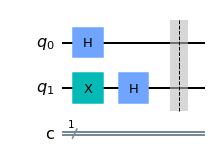

In [27]:
qc.draw(output='mpl')

In [17]:
#here we will create the oracle 
constant_oracle = QuantumCircuit(2)
constant_oracle.x(1)

In [18]:
qc+=constant_oracle
qc.barrier()

/home/qkd1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.


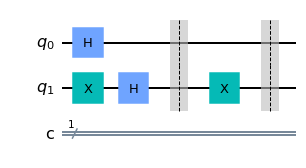

In [19]:
qc.draw(output='mpl')

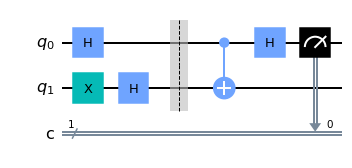

In [30]:
#performing Hadamard and measuring
qc.barrier()
qc.h(0)
qc.measure(0,0)
qc.draw(output='mpl')

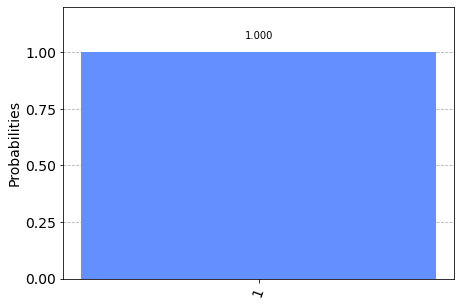

In [31]:
aer_sim=Aer.get_backend('aer_simulator')
qobj=assemble(qc)
results= aer_sim.run(qobj).result()
plot_histogram(results.get_counts())

In [28]:
#now if I want to try it for a constant, I will have to shift here from the qc at cell 3
#balanced oracle

balanced_oracle=QuantumCircuit(2)
balanced_oracle.cx(0,1)

/home/qkd1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  """Entry point for launching an IPython kernel.


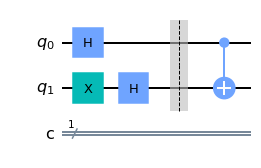

In [29]:
qc+=balanced_oracle
qc.draw(output='mpl')

#run the code after the circuit addition to get the simulation result before queuing the job on actual quantum hardware

In [33]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-05-21 00:57:40,176: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [34]:
from qiskit.tools.monitor import job_monitor

transpile_dj_circuit=transpile(qc, backend, optimization_level=3)
job=backend.run(transpile_dj_circuit)
job_monitor(job, interval =2 )

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Job Status: job has successfully run


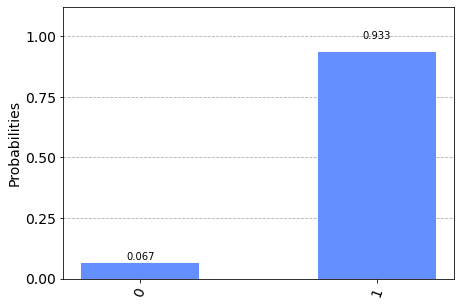

In [35]:
results=job.result()
answer=results.get_counts()
plot_histogram(answer)